<img src="https://drive.google.com/uc?export=view&id=1WpIuwT7ActKDLTILNYc4L1_2s20e8yMO" width=300/> 

# AI-1: ML/AI Basics
## Homework 1: kNN and Linear Regression

**AI1 Cohort 5**<br/>
**Univ.AI**<br/>
**Instructor**: Dr. Pavlos Protopapas<br />
**Maximum Score**: 50

<hr style="height:2.4pt">

## Name of people who have worked on this homework: 
Hari Krishna; Shubham Deshmukh

## [Optional] Google Colab notebook link with any other affiliated links:
https://colab.research.google.com/github/harimadhavan2000/HW1/blob/master/AI1_HW1_Scaffold.ipynb

<hr style="height:2.4pt">

## Instructions


- This homework is a jupyter notebook. Download and work on it in your local machine or you can work on it on Google Colab.

- This homework should be worked on in pairs.

- To submit the homework, either one of you upload the working notebook on Edstem and click the submit button on the bottom right corner.

- Homework should be submitted by only one student in a team of two. If both teammates submit, scores will be penalized. 

- Running cells out of order is a common pitfall in Jupyter Notebooks. To make sure your code works restart the kernel and run the whole notebook again before you submit. 

- If you decide to submit a colab notebook, ensure you have given **complete edit access** to the staff while submitting. Also add any data that requires reviewing on google drive and submit the link.

- Submit the homework well before the given deadline. Submissions after the deadline will not be graded.

- We have tried to include all the libraries you may need to do the assignment in the imports statement at the top of this notebook. We strongly suggest that you use those and not others as we may not be familiar with them.

- Comment your code well. This would help the graders in case there is any issue with the notebook while running. It is important to remember that the graders will not troubleshoot your code. 

- Please use .head() when viewing data. Do not submit a notebook that is **excessively long**. 

- In questions that require code to answer, such as "calculate the $R^2$", do not just output the value from a cell. Write a `print()` function that includes a reference to the calculated value, **not hardcoded**. For example: 
```
print(f'The R^2 is {R:.4f}')
```
- Your plots should include clear labels for the $x$ and $y$ axes as well as a descriptive title ("MSE plot" is not a descriptive title; "95 % confidence interval of coefficients of polynomial degree 5" is).

- **Ensure you make appropriate plots for all the questions it is applicable to, regardless of it being explicitly asked for.**

<span style="color:red"> 

**IMPORTANT** 

- Plagiarism of code/blocks of text is not acceptable for any Univ.AI submissions.
- You are allowed to refer a publicly available source of information for a SMALL chunk of code provided you cite it clearly. 
- Copying the code blatantly without attribution is not permitted under any case. 
- Sharing code between homework teams is strictly not allowed.
In case of any confusion you are advised to ask the staff on the Ed forum rather than assume the course of action needed. 
- If caught plagiarizing, you risk expulsion from the program.
</span>

<hr style="height:2pt">

<hr style="height:2pt">

<h2> Overview </h2> 

This assignment is the first where you will go through the process of loading a dataset, splitting it in train,validation and test sets, 
pre-processing it, and finally using it to run models and evaluating your results. 

We have two different datasets, one with car data in **Part 1** and another with data from an Indian matrimonial web site in **Part 2**.

For part 1, you will explore two simple methods for prediction,  **k-nearest neighbors regression (kNN)**, a *non-parametric* method, and **linear regression**, a *parametric* method. As you move towards Part 2 of the homework, you will work with multiple linear and polynomial regression.

In [ ]:
!pip install seaborn

In [1]:
# Importing standard libraries
import requests
from IPython.core.display import HTML
import os
import pathlib
working_dir = pathlib.Path().absolute()
os.chdir(working_dir)
import numpy as np
import operator
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

# Pandas tricks for better display
pd.options.display.max_columns = 50  
pd.options.display.max_rows = 500     
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

# Part 2 imports 
from scipy.stats import norm
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# Run this cell for more readable visuals 
large = 22; med = 16; small = 10
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'axes.linewidth': 2,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.style.use('seaborn-whitegrid')
plt.rcParams.update(params)
%matplotlib inline

<div class="alert alert-block alert-danger" style="color:black;background-color:#F6E6E2">
<h2 style="color:black;background-color:#F6E6E2"> Part A: k-NN and Linear Regression [30 points total] </h2>    <br />


### Problem Description: Predicting the Selling Price of Cars on CarDekho.com

According to its website, **CarDekho.com** is India's leading car search venture. 
Its website and app carry rich automotive content such as expert reviews, 
detailed specs and prices, comparisons as well as videos and pictures of all car brands and models available in India. 
Each car has a **Current selling price**, which is the price for buying the car on this site, and a **MRP**, 
which is the retail price of the car. These two prices differ depending on factors such as brand, 
make year, mileage, condition, etc.  
    
#### DATASET

The dataset contains 601 cars and is in file `car_dekho_full.csv`. It contains the following columns:

- **Year** - make year (year the car was made), 
- **Current_Selling_Price** - current price of a car on CarDekho.com (in lakhs),
- **MRP** - maximum retail price of a car (in lakhs),
- **Kms_Driven** - number of kilometers

Note: 1 *lakh*  is 100,000 Rupees in the Indian numbering system. Also, kilometers are used as a measure of distance instead of miles.

#### Your Task: 
Predict the `Current_Selling_Price` from the other features.


<div class="alert alert-block alert-danger" style="color:black;background-color:#F6E6E2">
    
<h3 style="color:black;background-color:#F6E6E2"> Question 1:   Exploratory Data Analysis (EDA) [10 points total] </h3>    <br />
    
To reach the goal of predicting the `Current_Selling_Price`, start by inspecting the dataset using Exploratory Data Analysis (EDA).


Load the dataset, inspect it and answer the following questions: 

**1.1** [2pts] Which variables are quantitative, and which are categorical? 
    
**1.2** [2pts] What are the means and standard deviations for `Current_Selling_Price` and `MRP`? 
    
**1.3** [2pts] What is the range of Kilometers that the cars have? 
Note: The range is the difference between the maximum value and the minimum value.


**1.4** [2pts] The goal of this part is to identify the best variable from which to predict our respone variable `Current Selling Price`. Plot a scatter plot between each predictor and reponse variable and examine the relationship between the predictors and `Current_Selling_Price`. Based on the plots, which is the  predictor that visually seems to best predict the `Current_Selling_Price`? 
    
<br/><br/>
Note: Label your axes.
</div>

### Solutions 

#### 1.1

**Which variables are quantitative, and which are categorical?**

In [ ]:
df = pd.read_csv("data/car_dekho_full.csv")

In [ ]:
df.head()

In [ ]:
# your code here
df.columns


Quantitative -  Current_Selling_Price, MRP, Kms_Driven \
Categorical - Year

#### 1.2

**What are the means and standard deviations for Current_Selling_Price and MRP?**

In [ ]:
# Name your variables as mean_csp, mean_mrp, std_csp, std_mrp

# your code here
mean_csp = df['Current_Selling_Price'].mean()
mean_mrp = df['MRP'].mean()
std_csp = df['Current_Selling_Price'].std()
std_mrp = df['MRP'].std()

# end your code here 


print ("The mean Current Selling Price is", mean_csp,"lakhs")
print ("The mean MRP is", mean_mrp,'lakhs')
print ("The Standard Deviation of Current Selling Price is", std_csp)
print ("The Standard Deviation of MRP is", std_mrp)

#### 1.3

**What is the range of Kilometers that the cars have?**

In [ ]:
# your code here

df['Kms_Driven'].describe()

The range is 500.000 -  213000.000 kilometers.

#### 1.4

**The goal of this part is to identify the best variable from which to predict our respone variable Current Selling Price. Plot a scatter plot between each predictor and reponse variable and examine the relationship between the predictors and Current_Selling_Price. Based on the plots, which is the predictor that visually seem to best predict the Current_Selling_Price?**

In [ ]:
# your code here
indep_columns = df.columns.drop('Current_Selling_Price')
for x in indep_columns:
    plt.figure()
    plt.scatter(df[x], df['Current_Selling_Price'])
    plt.xlabel(x)
    plt.ylabel('Current Selling Price')

**Your answer here**


We can see from the above generated figures that MRP seems to have the best relationship with the CSP.

<div class="alert alert-block alert-danger" style="color:black;background-color:#F6E6E2">
<h3 style="color:black;background-color:#F6E6E2"> Question 2:   k-Nearest Neighbors  [10 points total] </h3>    <br />

We begin our modeling with k-Nearest Neighbors (kNN) regression. You may use `sklearn`'s built-in functions.
<br /><br />
**2.1** [6pts] In this part, we will model a kNN regression on the predictor chosen above (1.4) and the response variable `Current_Selling_Price`.

<details>
<summary>
<font size="3" color="green">
<b>Click for instructions</b>
</font>
</summary>
    
- Split the dataset in train and test set with 75% training data and 25% testing data, using the random_state = 109. 
<br />
- Fit a kNN regression model to the training set for the following 8 different values of $k$:  $k = 1,2,3,5,7,10,60,100$. 
<br />
- Make 8 scatter plots of response vs. predictor for each $k$ arranged in a $4\times2$ grid.  Each figure should have plots of the prediction from the k-NN regression and the actual data points on the same figure, as well as axis labels, title, and legend. Consider using the subplot functionality, unless you first try this and then decide that you have a clearer, cleaner way of communicating these plots.
<br />
- Evaluate the $MSE$ for the fitted models on both the training and test sets **for each $k$**.
<br />
- Plot both the training and test $MSE$ values as a function of $k$ on the same figure.  Again, the figure must have axis labels and a legend.
<br />
- Find the best model based on the test $MSE$ values.
<br />
- Evaluate and report the $R^2$ of the best model.

</details>

<br /><br />
**2.2** [4pts] Discuss your results by answering the following questions.  You should answer the questions directly in a markdown cell of your notebook.

<details>
<summary>
<font size="3" color="green">
<b>Click for instructions</b>
</font>
</summary>
    
- How does the value of $k$ affect the fitted model?
<br />
- If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?  
- Do the training and test $MSE$ plots exhibit different trends?  Explain how the value of $k$ influences the training and test $MSE$ values.
<br />
- Run the same code by changing the random seed during the train-test split. Do you always get the same answer? If not, why?

</details>
</div>

### Solutions

#### 2.1
In this part, we will model a kNN regression on the predictor chosen above (1.4) and the response variable `Current_Selling_Price`.

In [ ]:
#Choosing your predictor and response variable

# your code here

x = df['MRP'].values
y = df['Current_Selling_Price'].values

# end of your code here 


##Splitting the data into train and test sets with 75% training data and 25% testing data. Set random_state=109
# your code here

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=109)

# end of your code here  


## Fit a kNN regression model to the training set for the following 8 different values of  𝑘 :  𝑘=1,2,3,5,7,10,60,100 .
## and make 8 scatter plots of response vs. predictor for each  𝑘 , arranged in a  4×2  grid. 
## Each figure should have plots of the prediction from the k-NN regression and the actual data points on the same figure, as well as axis labels, title, and legend 
# your code here 
# Plotting

for i in [1, 2, 3, 5, 7, 10, 60, 100]:
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train.reshape(-1, 1), y_train)
    y_pred = knn.predict(x_test.reshape(-1, 1))
    plt.figure()
    plt.scatter(x_test, y_test, label='Actual')
    plt.scatter(x_test, y_pred, label='Predicted')
    plt.xlabel('MRP')
    plt.ylabel('Current Selling Price')
    plt.title('k = {}'.format(i))
    plt.legend()



In [ ]:
# Now make the MSE plots
# your code here

mse = []
for i in [1, 2, 3, 5, 7, 10, 60, 100]:
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train.reshape(-1, 1), y_train)
    y_pred = knn.predict(x_test.reshape(-1, 1))
    mse.append(mean_squared_error(y_test, y_pred))
    
plt.scatter(range(8), mse)




In [ ]:
mse[4]

In [ ]:
# Find the best model
# your code here

idx = np.array(mse).argmin()
#k = 7 is the best model


In [ ]:
##Compute the R-squared for the best model
# your code here

knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(x_train.reshape(-1, 1), y_train)
y_pred = knn.predict(x_test.reshape(-1, 1))
r2 = r2_score(y_test, y_pred)
print(r2)

#### 2.2

**Your answer here**

**a) How does the value of $k$ affect the fitted model?**
<br />


**b) If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?**
<br />

**c) Do the training and test $MSE$ plots exhibit different trends?  Explain how the value of $k$ influences the training and test $MSE$ values.**
<br />

**d) Run the same code by changing the random seed during the train-test split. Do you always get the same answer? If not, why?**



a) k is the number of neighbouring point choses to compute/predict the response at a point \
b) since $y = \frac{1}{k} \sum ^k _{i=0} x_i$ with $x_i$ are the k nearest neighbours, by substituting $k=n$ we get the trivial result that $y= \bar x$; ie the mean value is the response at all points. \
c) the higher the k, the more uniform the response is with no attempt to fit each point, thus, the train error is high, and similarly so is the test error. for lower k, the train prediction attempts to fit each data point as closely as possible; so train error will be low, but due to this overfitting; the test error will be high. we aim to choose an optimum value to minimize test mse; thus k = 7. train error decreases with k; test error decreases to an optimum then increases. \
d) No, as the optimum value may change according to the model that arises from the split

<div class="alert alert-block alert-danger" style="color:black;background-color:#F6E6E2">
<h3 style="color:black;background-color:#F6E6E2"> Question 3:  Simple Linear Regression   [10 points total] </h3>   

<br /><br />
**3.1** [5pts] We will now fit our data using a linear regression model. Choose the same **predictor** and **response** variables used to model kNN regression.

<details>
<summary>
<font size="3" color="green">
<b>Click for instructions</b>
</font>
</summary>
    
- You will use the same 75% training and 25% testing split of the data, using the random_state = 110. 
<br />
- Run a Linear Regression model.
<br />
- Report the slope/coefficient and intercept values for the fitted linear model.
<br />
- Report the $MSE$ for the training and test sets and the $R^2$ from the test set.
<br />
- Plot the **residuals** $e = y_{train} - \hat{y}_{train}$ of the model on the training set on the Y-axis and the response variable $y_{train}$ on the X-axis. Draw a horizontal line denoting the zero residual value on the Y-axis. Discuss the shape of the plot and what it shows about the quality of the model.
<br /><br />
    
**Note:** Use the `sklearn` module for linear regression. This module has built-in functions to summarize the results of regression and produce residual plots. Create a `Linear Regression` model, use the `fit` method in the instance for fitting a linear regression model, and use the `predict` method to make predictions. As previously, you may use the `mean_squared_error` function to compute $MSE$.

    
</details>

<br /><br />

**3.2** [5pts] Discuss your results by answering the following questions.  
    
<details>
<summary>
<font size="3" color="green">
<b>Click for instructions</b>
</font>
</summary>   
- How does the test $MSE$ score compare with the best test $MSE$ value obtained with k-NN regression? 
<br />
- What does the sign of the slope of the fitted linear model convey about the data? 
<br />
- Based on the residual plot that you made, discuss whether or not the assumption of linearity is valid for this data.
<details>
</div>


### Solutions

#### 3.1
**Predict the selling price**

In [ ]:
# your code here

x = df['MRP'].values
y = df['Current_Selling_Price'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=110)

In [ ]:
## Fit a linear model to the train data

# your code here

lreg = LinearRegression()
lreg.fit(x_train.reshape(-1, 1), y_train)
y_pred = lreg.predict(x_test.reshape(-1, 1))

print("beta_1 and beta_0 are:",  lreg.coef_[0], lreg.intercept_)
print("the mse train is ", mean_squared_error(y_train, lreg.predict(x_train.reshape(-1, 1))))
print("the mse test is ", mean_squared_error(y_test, y_pred))
print("the r-squared on test is ", r2_score(y_test, y_pred))

# end of your code here 


## Plot the **residuals** 
# your code here 

residual = y_test - y_pred
plt.plot(x_test, residual, 'o')
plt.plot(x_test, np.zeros(len(x_test)), 'r-')


we see that the residuals increase with x, so we may infer an increasing, i.e non constant variance in data

#### 3.2

**Your answer here**

**a) How does the test $MSE$ score compare with the best test $MSE$ value obtained with k-NN regression?**
<br />


**b) What does the sign of the slope of the fitted linear model convey about the data?**
<br />


**c) Based on the residual plot that you made, discuss whether or not the assumption of linearity is valid for this data.
<br />**



a)  it is worse than that of the best knn models \
b) positive corellations between MRP and selling price \
c) not valid as data is not of constant variance

<div class="alert alert-block alert-danger" style="color:black;background-color:#F6E6E2">
<h3 style="color:black;background-color:#F6E6E2"> Question 4:  Linear Regression with Feature engineering [Optional] </h3>   

<br /><br />
**4.1** Creating a new variable from existing data: percentage depreciation.
    
<details>
<summary>
<font size="3" color="green">
<b>Click for instructions</b>
</font>
</summary>
    
Feature engineering involves transforming data into features that better represent the underlying problem to the predictive models. This results in improved model accuracy on unseen data. 
<br />
Our previous regression model relates the Current selling price to the MRP of the car with the equation:
<br /><br />
$$CSP = \beta_0 + \beta_1*MRP$$
<br />
However, this linear equation does not incorparate other interesting variables such as the ```year of manufacture```, or the ```kms driven```, which maybe important factors that affect the overall price of the car. 
<br />
Instead of using multi-linear analysis, we can perform some intelligent feature engineering to identify other simple linear relationships within our data.
<br />
From practical experience, we know that the percentage drop of a car's price is proportional to the age of the car ([more on car depreciation here](https://www.finder.com/what-is-car-depreciation)). 
<br />
Hence, it makes sense to investigate this variable seperately and try to identify possible relationships with other variables.  
<br />
Define the percentage depreciation of the Current selling price to the MRP as follows:
<br /><br />
$$\textrm{Percentage of the Selling Price}=perc =\frac{MRP - Selling Price}{MRP}$$
</details>
    
<br /><br />
**4.2** Exploratory Data Analysis.

<details>
<summary>
<font size="3" color="green">
<b>Click for instructions</b>
</font>
</summary>
    
For this section, we will consider `perc` to be our intermediate response variable. To understand the relationship between `perc` and our predictor variables we will perform EDA.
<br /><br />
Answer the following questions by plotting graphs.
<br /><br />
a) It is seen previosuly that there is a relationship between `Year` and `Current Selling Price`. Is the relationship between `Years` and `perc` the same. If not, how has it changed and why do you think so? Plot a scatter plot or any other plot of your choice and write your inferences.
<br />
b) Is the trend between the `MRP` and `perc` the same as that between `MRP` and `Current Selling Price`? Plot a scatter plot or any other plot of your choice and write your inferences.
<br />
c) Does there seem to be a relationship between `Kms_Driven` and `perc`? Plot a scatter plot or any other plot of your choice and write your inferences.
<br />
d) Which is the best predictor to predict `perc`, if there is one? Is it the same as that of `Current Selling price` or has it changed? Plot a scatter plot or any other plot of your choice and write your inferences.
    
</details>
    
<br /><br />
    
**4.3** Perform additional EDA.

<details>
<summary>
<font size="3" color="green">
<b>Click for instructions</b>
</font>
</summary>
    
Feel free to use other plots and statistics to find the best predictor and/or understand the relationship between variables. One example is given below. It is a plot of `Current Selling Price` vs `Year` that is color coded based on the `Kms_Driven`. 
    
<img src="https://drive.google.com/uc?export=view&id=1cfXPPdh0qjy4X8jbt7G5vQAoXTnQfYH1" width=600/> 
    
</details>
<br /><br /> 
    
**4.4** Fitting a Linear Regression model.
    
<details>
<summary>
<font size="3" color="green">
<b>Click for instructions</b>
</font>
</summary>
    
Based on the previous EDA choose appropriate **feature** variable(s) and **response** variable.

- Again, use split train-test sets with training data of 75% and testing data of 25%
<br />
- Fit a Linear Regression model for each of the predictors.
<br />
- Predict the model for the train and test data
<br />
- Plot a graph with the test data with predictor variable on the *x* axis and `perc` on the *y* axis. Also plot the fit curve. Ensure you use the correct labels and show the legend.
<br />
- Report the $MSE$ score from the training and test sets.
<br />
- Find the best model i.e. the best predictor based on the $MSE$ of each model.
</details>
<br /><br />

**4.5** Predicting The Current Selling Price using ```perc``` 
<br /><br />
After performing the above analysis, answer briefly as to why are we getting such a dramatic increase in the R2 score?
    <br /><br />
 </div>

### Solutions

#### 4.1

In [ ]:
df

In [ ]:
#Create a new column perc and add to the dataframe
# your code here

df['perc'] = (df['MRP'] - df['Current_Selling_Price'])/df['MRP']

#Creating a new column perc


#### 4.2

In [ ]:
# your code here

plt.plot(df['Year'], df['Current_Selling_Price'], 'o')
plt.xlabel('Year')
plt.ylabel('Current Selling Price')
plt.figure()
plt.plot(df['perc'], df['Current_Selling_Price'], '*')
plt.xlabel('perc')
plt.ylabel('Current Selling Price')

**Your answer here**


# your code here
the relationship between year and csp is roughly positive, the relationship between perc and csp is roughly negative, as expected. 



**Your answer here**


In [ ]:
# your code here
#scatter plot between mrp and perc

plt.plot(df['MRP'], df['perc'], 'o')
plt.xlabel('MRP')
plt.ylabel('perc')
plt.figure()
plt.plot(df['MRP'], df['Current_Selling_Price'], 'o')
plt.xlabel('MRP')
plt.ylabel('Current_Selling_Price')

In [ ]:
plt.plot(df['Kms_Driven'], df['perc'], 'o')
plt.xlabel('Kms_Driven')
plt.ylabel('perc')

**Your answer here**


#### 4.3

In [ ]:
#your code here

#### 4.4

In [ ]:
# Linear Regression using Year as the reponse variable
# your code here


In [ ]:
# Linear Regression using MRP as the reponse variable
# your code here


In [ ]:
# Linear Regression using KMs Driven as the reponse variable
# your code here


**Your answer here**


#### 4.5

In [ ]:
#Linear Regression using Year as the reponse variable
# your code here


**Your answer here**


<div class="alert alert-block alert-danger" style="color:black;background-color:#F6E6E2">
<h2 style="color:black;background-color:#F6E6E2"> Part Β :  Multi-Linear Regression [20 points total] </h2><br />


### Problem Description: 

Analysis of publically available profiles on **simplymarry** to learn more about the biases, income disparity & other interesting trends in India. 

#### Dataset

The dataset was aggregated from the **simplymarry** site.

All the attributes refer to traits and preferences of the person looking for a spouse. 

- **age** - Age of person looking for a spouse
- **gender** - Female:0, Male:1 
- **height** - Height in inches
- **bmi** - BMI calculated based on height and weight
- **eating** - {'Doesn't Matter':0, 'Jain': 1, 'Vegetarian': 2, 'Vegetarian With Eggs': 3, 'Non Vegetarian': 4}
- **family_type** - ('Doesn't Matter': 0, 'Others':3, 'Nuclear': 1, 'Joint family both parents': 2, 'Joint family only mother':2, 'Joint family father mother and brothers sisters':2, 'Joint family single parent brothers and or sisters':2, 'Joint family only father': 2)
- **status** - If social status matters to the person looking for a spouse: {'Doesn't Matter': 0, 'Middle Class': 1, 'Upper Middle Class': 2, 'High Class': 3, 'Rich / Affluent': 4}
- **manglik** - {'No': 0, 'Yes': 1, 'Do Not Know': 2} ([More on this feature](https://en.wikipedia.org/wiki/Mangala_Dosha))
- **drinking** - {'Doesn't Matter':0, 'No': 1, 'Occasionally': 2, 'Yes': 3}
- **complexion** - {'Very Fair ': 1, 'Fair ': 2, 'Wheatish Medium ': 4, 'Wheatish ':3, 'Dark':5}
- **body** - {'Slim': 1, 'Average': 2, 'Heavy': 3, 'Athletic': 4}
- **education** - {'High School':0, 'Some college':1,'Undergrad':2, 'Grad':3, 'Doctorate':4}
- **city** - ('International': 1, 'Mumbai': 2, 'Delhi':3, 'Kolkata':4,'Bengaluru':5, 'Chennai':6, 'Hyderabad':7, 'Pune':8, 'Ahmedabad':9,'Surat':10, 'Vishakapatnam':11, 'Others':12)
- **income** - {Annual income in dollars}

*source: Harvard IACS*

#### Sensitive attributes in the data

It is thought that users are mostly sincere when stating their preferences about their desired partner, and are unlikely to hide any deeply held cultural or sociological biases in order to be perceived as being politically correct. This might take care of the problem with surveys where responses touching on social norms are notorious for self-report bias.

This is a dataset designed to make you think about issues of bias and social issues in datasets. We hope that you will be able to derive insights into the above mentioned sociological biases. The data could potentially provide answers to interesting questions with associated policy ramifications, such as do these biases reduce among more educated users, or more urban users?  

In [4]:
# Read the file named "income_prediction.csv"

df = pd.read_csv('data/income_prediction.csv')

<div class="alert alert-block alert-danger" style="color:black;background-color:#F6E6E2">
<h3 style="color:black;background-color:#F6E6E2"> Question 5:   Using Data science to learn more about Indian society  [15 points total] </h3>    <br />


First we are going to use simple analytics to learn more about Indian society with the help of this dataset.

The idea is to use basic modeling based on averages & sample distributions to uncover suspected biases, such as gender, skin tone & manglik status.

Answer the below questions using plots & simple statistics
<br /><br />
**5.1** [2pt] Is there a gender-bias for income of participants?
<br /><br />
**5.2** [2pt] Is there a correlation between income and skin complexion?
<br /><br />
**5.3** [2pt] Is there a discernible trend in the incomes of participants from different regions/cities?
<br /><br />
**5.4** [1pt] Is there a clear trend between BMI and the income?
<br /><br />
**5.5** [2pt] Does the level of education show a clear trend with income?
<br /><br />
**5.6** [2pt] Do any of the numeric attributes show a clear non-linear dependence with the amount of income?
<br /><br />
**5.7** [2pt] Is the income lower or high for those living in 'nuclear' families?
<br /><br />
**5.8** [2pt] Does being 'Manglik' negatively affect the income of participants?

### Solutions

In [93]:
df.head()

,age,gender,height,kgs,bmi,eating,status,marital_status,family_type,manglik,horoscope,drinking,smoking,values,complexion,body,caste_imp,employed,living,education,income,city
0,25,1,62,50,20.161,4,1,1,2,0,1,1,1,2,2,1,1,4,1,0,2500,12
1,28,0,66,62,22.062,2,2,1,2,2,1,1,1,2,2,2,1,4,1,2,7500,8
2,30,1,69,72,23.441,2,1,1,1,1,1,1,1,5,2,1,0,5,0,2,7500,8
3,34,0,63,58,22.651,4,1,4,1,0,1,1,1,2,2,2,0,4,1,2,4167,10
4,30,0,62,72,29.032,2,2,1,1,0,1,1,1,3,1,2,0,5,1,3,20833,6


#### 5.1

128744 male
34342 female


(array([1561.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        5852.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

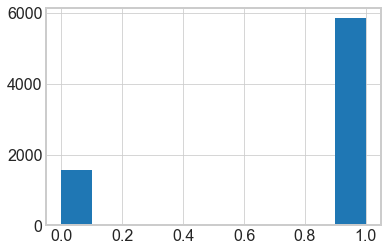

In [101]:
# your code here

print(df[df['gender']==1].size, 'male')
print(df[df['gender']==0].size, 'female')
plt.hist(df['gender'])


#### 5.2

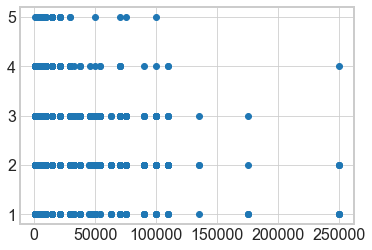

In [109]:
# you code here 
#correlation between income and skin complexion

plt.scatter(df['income'], df['complexion'])


#### 5.3

<BarContainer object of 7413 artists>

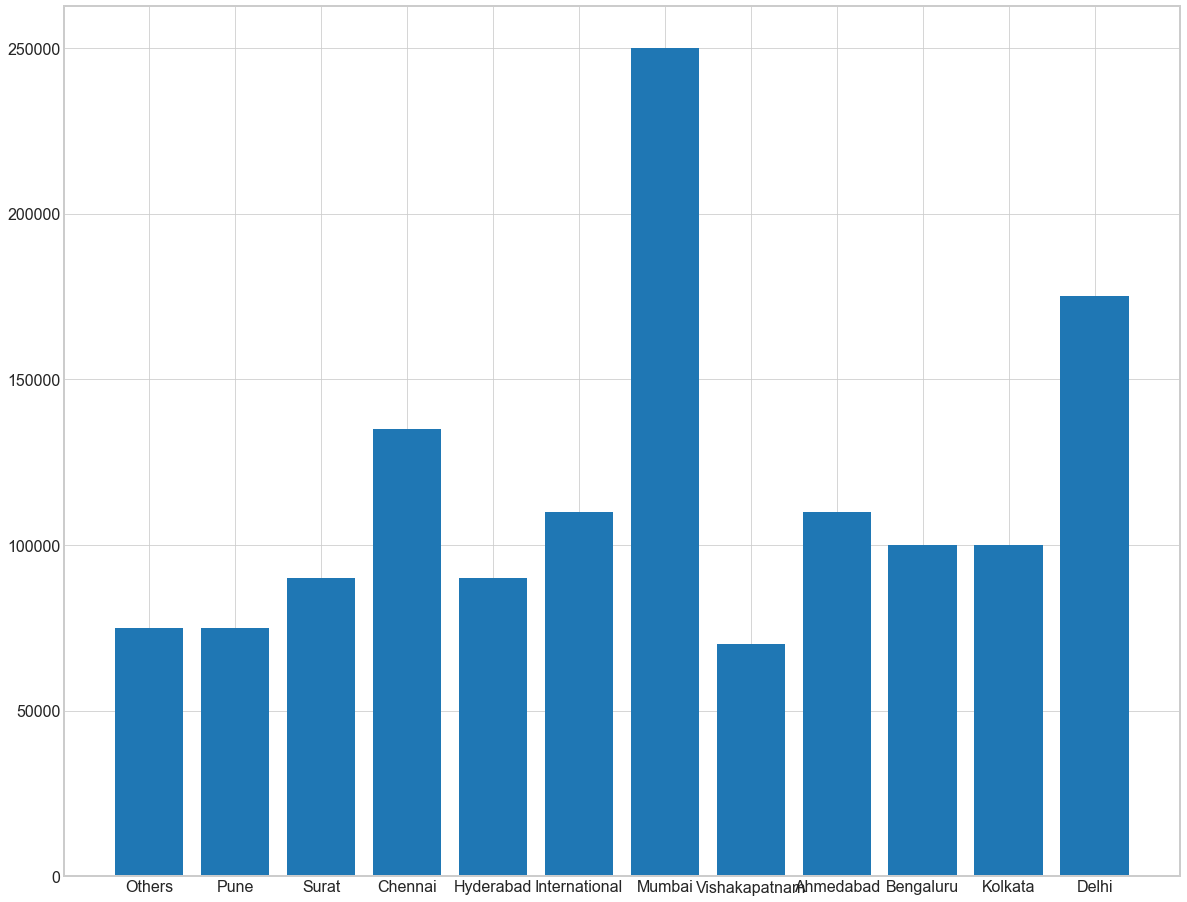

In [112]:
# your code here
city_map = {'International': 1, 'Mumbai': 2, 'Delhi':3, 'Kolkata':4,'Bengaluru':5, 'Chennai':6, 'Hyderabad':7, 'Pune':8, 'Ahmedabad':9,'Surat':10, 'Vishakapatnam':11, 'Others':12}
inv_dict = {v: k for k, v in city_map.items()}
plt.figure(figsize = (20, 16))
plt.bar(df['city'].map(inv_dict), df['income'])


#### 5.4

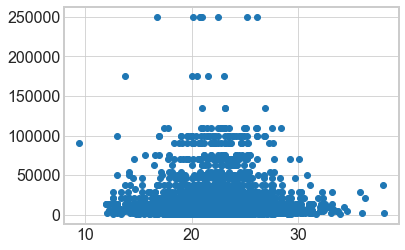

In [5]:
# your code here
plt.plot(df['bmi'], df['income'], 'o')

#### 5.5

c:\Users\munch\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education', ylabel='income'>

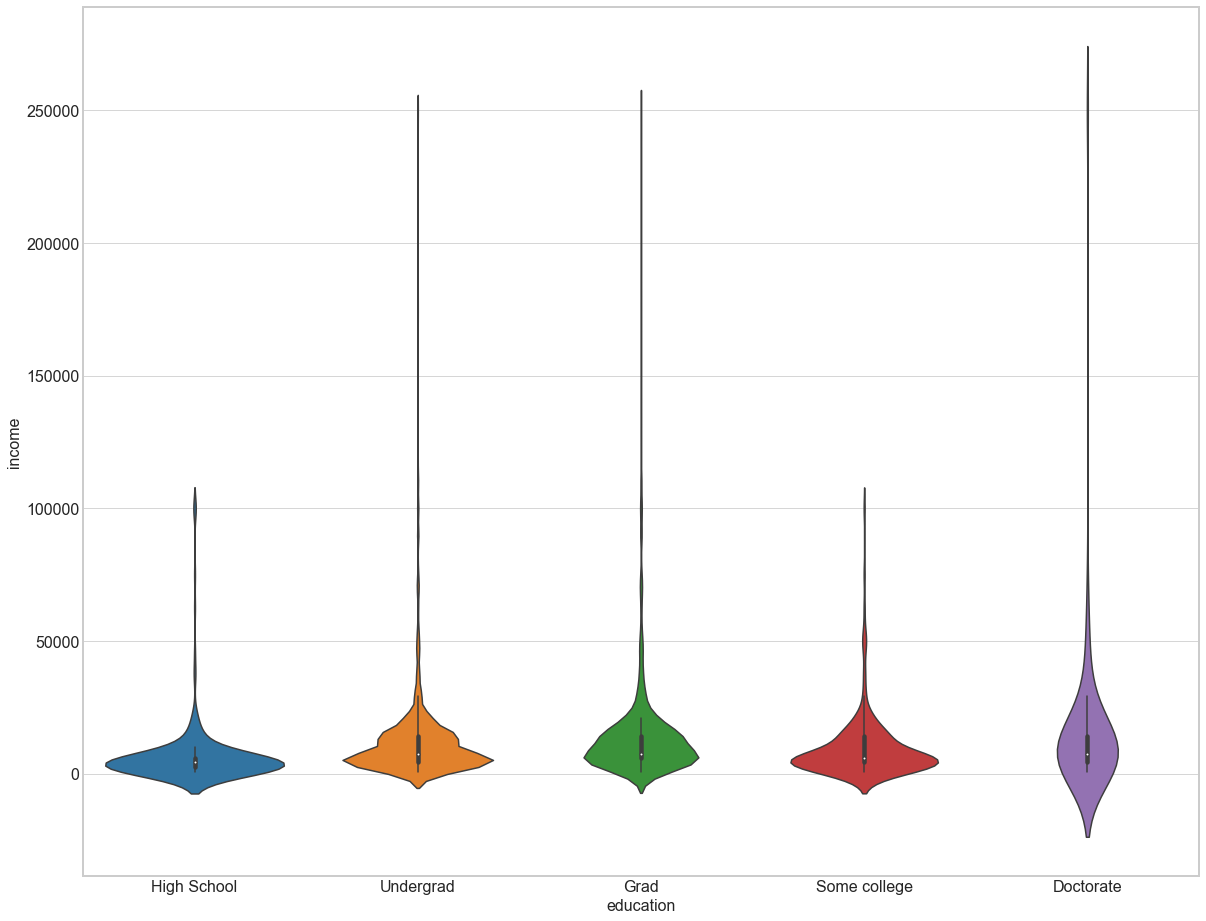

In [12]:
# your code here
ed_dict = {'High School':0, 'Some college':1,'Undergrad':2, 'Grad':3, 'Doctorate':4}
inv_dict = {v: k for k, v in ed_dict.items()}
plt.figure(figsize = (20, 16))
sns.violinplot(df['education'].map(inv_dict), df['income'])


#### 5.6

In [ ]:
# your code here


#### 5.7

In [ ]:
# your code here


#### 5.8

In [ ]:
# your code here


<div class="alert alert-block alert-danger" style="color:black;background-color:#F6E6E2">
<h3 style="color:black;background-color:#F6E6E2"> Question 6:  Calculate the Gini Index  [5 points total] </h3>    <br />


Gini coefficients are often used to quantify income inequality, read more [here](http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm).

The Gini coefficient is defined by the formula:

$G = \dfrac{ \sum_{i=1}^{n} (2i - n - 1) x_i}{n  \sum_{i=1}^{n} x_i}$

where $x$ is an observed value, $n$ is the number of values observed and $i$ is the rank of values in **ascending** order.

A Gini Index of 0 implies perfect income equality, whereas a gini index close to 1 implies a concentration of wealth among the richest few.
<br /><br />
**6.1** [3 pts] Based on the above formula, calculate the Gini coffient for the income of the participants of this dataset
<br /><br />
**6.2** [2 pts] Compare your gini index with other countries

According to the [world bank estimate](https://www.indexmundi.com/facts/indicators/SI.POV.GINI/rankings) the gini index of South Africa is 0.6 while that of Ukrain is 0.25. 

Based on your calculated gini index value for this dataset, what is your conclusion on the income disparity in the three countries?

### Solutions

#### 6.1

In [29]:
# your code here
def gini(y):
    x = np.sort(y.values)
    n, d = 0, 0
    for i in range(len(x)):
        n += (2*i - len(x) -1)*x[i]
        d += x[i]
    return n/(d*len(x))


In [30]:
gini(df['income'])

0.4941561348985677

#### 6.2

In [31]:
# your code here
gini_df = pd.read_csv('data/gini.csv')


In [47]:
gini_df['Value'].idxmin(np.abs(gini_df['Value'] - 100*gini(df['income'])))

161

In [50]:
np.abs(gini_df['Value'] - 100*gini(df['income'])).argmin()

14

In [51]:
gini_df.iloc[14]

Rank               15
Country    Costa Rica
Value            49.3
Year             2020
Name: 14, dtype: object

In [ ]:
#somewhat equal distribution of income

<div class="alert alert-block alert-danger" style="color:black;background-color:#F6E6E2">
<h3 style="color:black;background-color:#F6E6E2"> Question 7:  Multi-Linear Regression [Optional] </h3>    <br />



Now we increase the scope of our analysis to solve another problem that is related to income of the participants.

![](https://github.com/hargun3045/blog-dump/blob/master/modi.png?raw=true)

<div class="alert alert-block alert-danger" style="color:black;background-color:#F6E6E2">

Owing to a large number of people underreporting their income to evade taxes, the Income Tax Department of India wants you to build a machine learning model that can predict the income of a given tax-payer based on commonly available information.

This will help the department red flag suspected individuals who may show discernable trends of earing more but are excessively under-reporting on their annual income.

The goal is to build the best model with the given dataset, using both categorical and continuous predictors that are available.

<div class="alert alert-block alert-danger" style="color:black;background-color:#F6E6E2">

Fit a multiple linear regression model to the training set.
Use the `sklearn` library.

#### Deliverables
Your code should be contained in a Jupyter notebook cell.  An appropriate level of comments is necessary.  Your code should run and output the required outputs described below.

#### Required Outputs
- Fit a multiple linear regression model on the training set
- Predict on train and test sets
- Calculate the MSE for the train & test set
- Report the $R^2$ score on the test set.
- Make a plot of Residuals vs Log of predicted values $\hat{y}$, with residuals on the $Y$-axis and predicted values on the $X$-axis. Use the formula ${\epsilon} = y - \hat{y}$ to compute the residual values. Include a horizontal line denoting the zero residual value on the $Y$-axis.
- Plot a histogram of the magnitudes of the residuals.

In [ ]:
# Here we use another efficient way of splitting the datset into train and test sets using a "mask"

#You can just run the code below, and just use df_train and df_test for this part of the homework directly

mask = np.ones(len(df))

# Using indices only

itrain, itest = train_test_split(range(len(df)),train_size=0.8,random_state = 25)

#setting all test indices as zero
mask[itest] = 0

# Converting mask into a boolean expression

mask = mask==1

In [ ]:
df_train = df[mask] # this will give you a dataframe of only training indicies
df_test = df[~mask] # this will give you a dataframe of only test indicies

In [ ]:
# A quick look of the training dataframe
df_train.head()

In [ ]:
# your code here
